In [83]:
import numpy as np
import matplotlib.pyplot as plt
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

In [84]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.07174046],
       [3.024495  ]])

In [85]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[ 4.07174046],
       [10.12073047]])

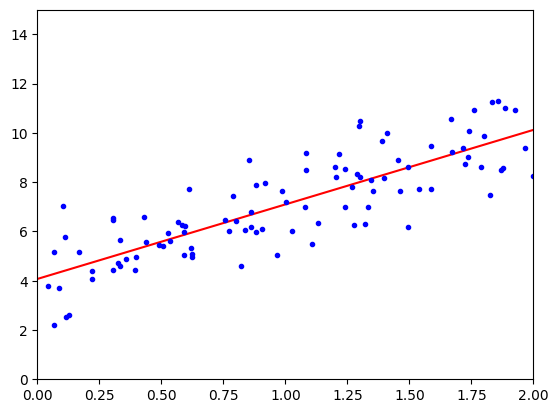

In [86]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [87]:
theta_best_svd, residuls, rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.07174046],
       [3.024495  ]])

In [88]:
np.linalg.pinv(x_b).dot(y)

array([[4.07174046],
       [3.024495  ]])

In [89]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[4.07174046],
       [3.024495  ]])

In [90]:
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
  return t0/(t+t1)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=x_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients
theta

array([[4.17052048],
       [3.00383849]])

In [91]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([3.98323613]), array([2.98406448]))

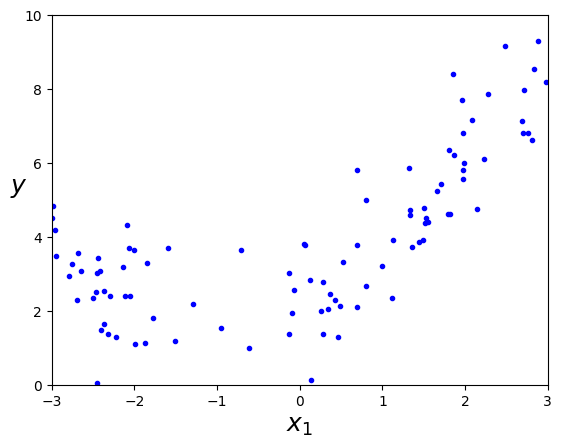

In [92]:
import matplotlib.pyplot as plt
m=100
x=6* np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)
plt.plot(x,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [93]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
x_poly=poly_features.fit_transform(x)
x[0]

array([1.65582731])

In [94]:
x_poly[0]

array([1.65582731, 2.74176407])

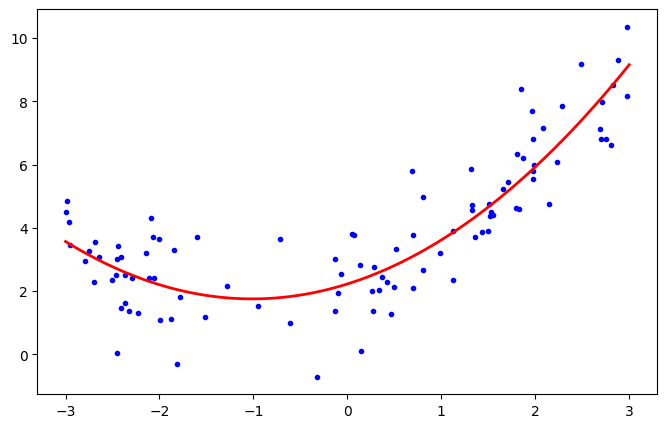

In [95]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_, lin_reg.coef_
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(8, 5))
plt.plot(x, y, "b.", label="Training data")  # Original data points
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  train_errors, test_errors = [], []
  for m in range(1, len(x_train)):
    model.fit(x_train[:m], y_train[:m])
    y_train_predict = model.predict(x_train[:m])
    y_test_predict = model.predict(x_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
  plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test set")
  plt.legend()

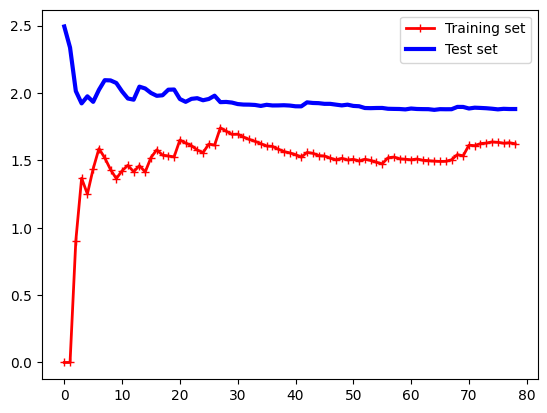

In [97]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,x,y)

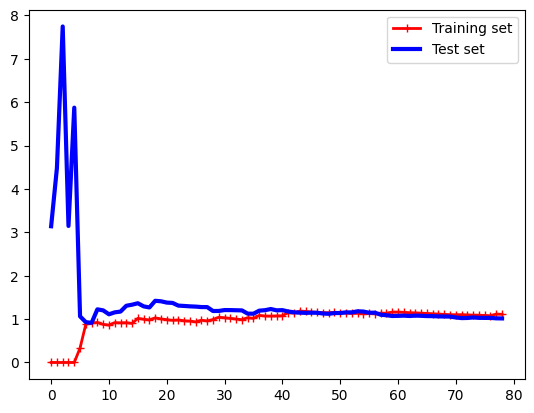

In [98]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ('poly_features',PolynomialFeatures(degree=4,include_bias=False)),
    ('lin_reg',LinearRegression()),
])
plot_learning_curves(polynomial_regression,x,y)

In [99]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([5.09109359])

In [100]:
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([5.07129688])

In [101]:
from sklearn.linear_model import Lasso
lasso_reg=Ridge(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([5.09410499])

In [102]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([5.0574182])

In [108]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
poly_scaler=Pipeline([
    ('poly_features',PolynomialFeatures(degree=90,include_bias=False)),
    ('std_scaler',StandardScaler()),
])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train_poly_scaled=poly_scaler.fit_transform(x_train)
x_val_poly_scaled=poly_scaler.transform(x_test)
sgd_reg=SGDRegressor(max_iter=1,tol=1e10,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)
minimum_vld_error=float('inf')
best_epoch=None
best_model=None
for epoch in range(1000):
  sgd_reg.fit(x_train_poly_scaled,y_train)
  y_val_predict=sgd_reg.predict(x_val_poly_scaled)
  val_error=mean_squared_error(y_test,y_val_predict)
  if val_error<minimum_vld_error:
    minimum_vld_error=val_error
    best_epoch=epoch
    best_model=clone(sgd_reg)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/loc

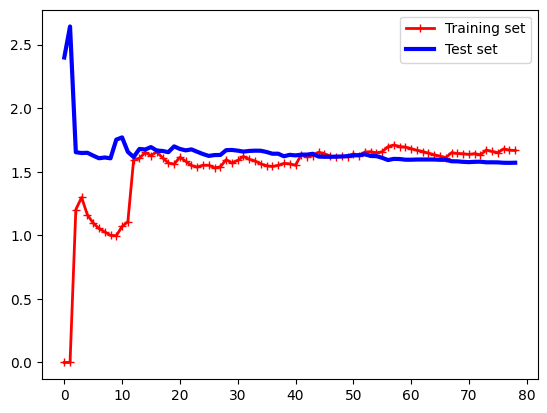

In [109]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,x,y)

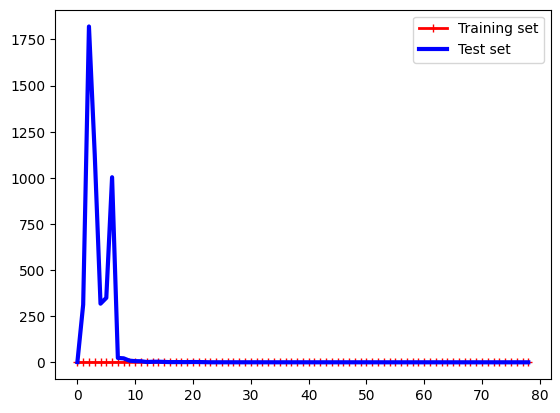

In [117]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ('poly_features',PolynomialFeatures(degree=6,include_bias=False)),
    ('lin_reg',LinearRegression()),
])
plot_learning_curves(polynomial_regression,x,y)

In [118]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [122]:
x=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int64)

In [123]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

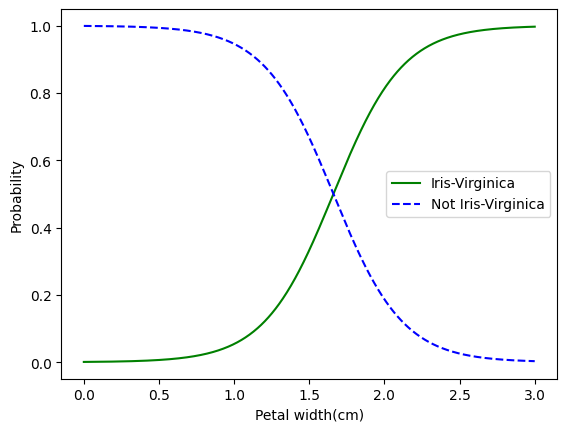

In [126]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(x_new)
plt.plot(x_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(x_new,y_proba[:,0],'b--',label='Not Iris-Virginica')
plt.legend()
plt.xlabel('Petal width(cm)')
plt.ylabel('Probability')
plt.show()

In [132]:
log_reg.predict([[5.0],[5.0]])

array([1, 1])

In [133]:
x=iris["data"][:,(2,3)]
y=iris["target"]
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [134]:
softmax_reg.predict([[5,2]])

array([2])

In [135]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])